# Homework 3

**Yiğit Berk SARIBOĞA** 

Note: You may need to download the .ipynb file to see the map outputs.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

import folium
from folium import Map
from folium.plugins import HeatMap

import seaborn as sns
from scipy.stats import norm
import requests

from xmltodict import parse
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud

from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO


# Question 1

**Step 1:** Using the library [Beautiful Soup](https://pypi.org/project/beautifulsoup4/) write a function that takes a URL from a specific Turkish Newspaper (any newspaper you'd like) and extracts and then returns the text (not the HTML source) of the news article given in the URL. (Warning: you cannot write a universal function that works for every newspaper. The function has to be specific to a specific newspaper.)

**Step 2:** Write a separate function that cleans the text and removes all Turkish stopwords for a text coming from Step 1.

**Step 3:** Display word clouds of 5 news articles after you apply the functions in Step 1 and Step 2.

## Answers

### Step 1

The "sozcu" function is a function that takes a URL from the Sözcü Newspaper using the Beautiful Soup library and extracts the text of the random news article given in the URL and then returns it.

In [2]:
def sozcu(Link):
    with requests.get(f'{Link}') as link:
        raw = parse(link.text)
        sozcu_link = raw['rss']['channel']['item']
        loc = np.random.randint(len(sozcu_link))
        raw_link = sozcu_link[loc]['link']
        with requests.get(raw_link) as link:
            bs = BeautifulSoup(link.content,'html.parser')
    return ' '.join([x.text for x in bs.find_all('p')])

Testing the function.

In [33]:
test_news = sozcu('https://www.sozcu.com.tr/rss/tum-haberler.xml')
test_news

'Adalet Bakanı Bekir Bozdağ, katıldığı canlı yayınında gündeme ilişkin değerlendirmelerde bulundu, soruları yanıtladı. Seçim kanununda yapılan değişikliklerin uygulanma tarihine ilişkin kamuoyundaki değerlendirmeler sorulan Bozdağ, seçimlerle ilgili önemli düzenlemelerin hem Anayasa’da hem de seçim kanunlarında yer aldığını söyledi. Anayasanın 67. maddesinin çok açık olduğunu, “seçim kanunlarında yapılan değişiklikler, bir yıl içinde yapılacak seçimlerde uygulanmaz” ifadesinin yer aldığını anlatan Bekir Bozdağ, sözlerini şöyle sürdürdü: “Çok açık ve net. Bu konuda bizce tartışma yok. YSK noktayı koymuş. Bir yıllık süre seçimin yapıldığı tarihe göre belirlenir. Seçim kanunlarındaki değişiklikler nisanda yürürlüğe girdi. Seçimle ilgili mayıs ayına ilişkin değerlendirme yapılıyor. Dolayısıyla her halükarda mayısta belirlenecek tarih bir yılı aştığı için YSK’nin verdiği karar açık, ortada, kesin karardır. Seçim kanunlarında yapılacak değişiklikler aynen uygulanacaktır.” SEÇİM TARİHİNİN İLA

### Step 2

The "stopwordCleanTR" function is a function that cleans the text and removes all Turkish stopwords from the text

In [4]:
def stopwordCleanTR(text):
    raw = []
    stwords = stopwords.words('turkish')
    words = word_tokenize(text)
    for x in words:
        if x.lower() not in stwords:
            raw.append(x)
            new_text = " ".join(raw)
    return new_text

In [34]:
test_clean_news = stopwordCleanTR(test_news)
test_clean_news

"Adalet Bakanı Bekir Bozdağ , katıldığı canlı yayınında gündeme ilişkin değerlendirmelerde bulundu , soruları yanıtladı . Seçim kanununda yapılan değişikliklerin uygulanma tarihine ilişkin kamuoyundaki değerlendirmeler sorulan Bozdağ , seçimlerle ilgili önemli düzenlemelerin Anayasa ’ seçim kanunlarında yer aldığını söyledi . Anayasanın 67. maddesinin açık olduğunu , “ seçim kanunlarında yapılan değişiklikler , bir yıl içinde yapılacak seçimlerde uygulanmaz ” ifadesinin yer aldığını anlatan Bekir Bozdağ , sözlerini şöyle sürdürdü : “ açık net . konuda bizce tartışma yok . YSK noktayı koymuş . Bir yıllık süre seçimin yapıldığı tarihe göre belirlenir . Seçim kanunlarındaki değişiklikler nisanda yürürlüğe girdi . Seçimle ilgili mayıs ayına ilişkin değerlendirme yapılıyor . Dolayısıyla halükarda mayısta belirlenecek tarih bir yılı aştığı YSK ’ nin verdiği karar açık , ortada , kesin karardır . Seçim kanunlarında yapılacak değişiklikler aynen uygulanacaktır. ” SEÇİM TARİHİNİN İLANI Bakan Bo

### Step 3

The "cloudplot" function is a function that display word clouds.

In [6]:
def cloudplot(news):
    dict(sorted(Counter(news.split()).items(),key = lambda x: x[1], reverse=True)[:100])
    plt.figure(figsize=(10,10))
    cloud = WordCloud(width = 1200, height = 800,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
    plt.imshow(cloud.generate(news))

Displaying word clouds of 5 news article.

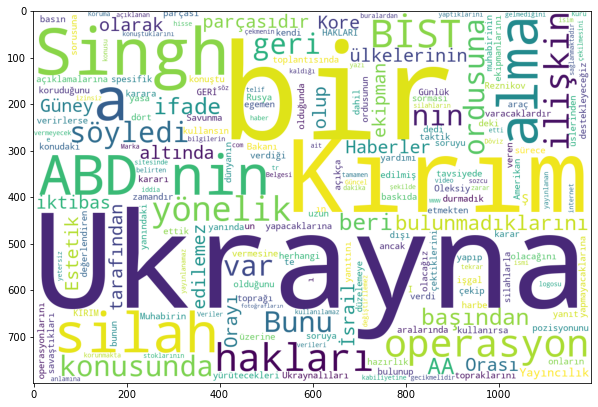

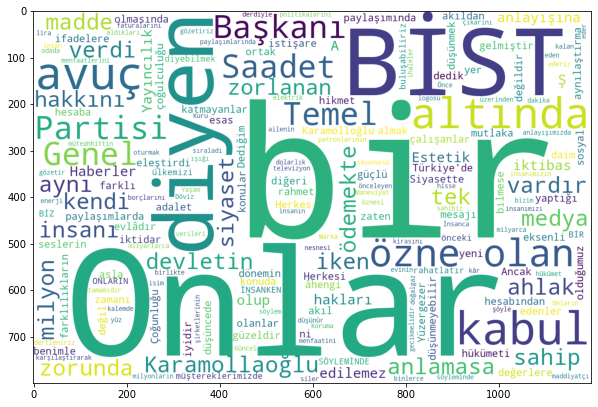

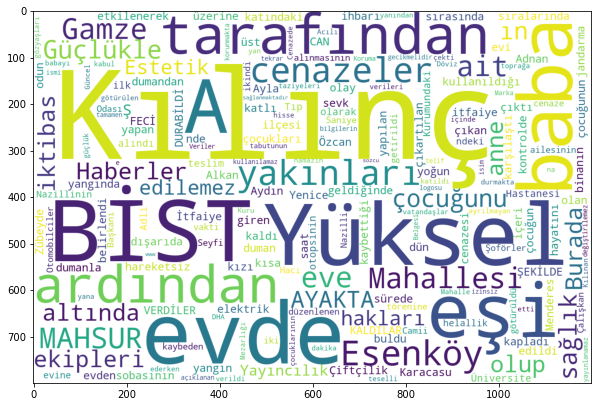

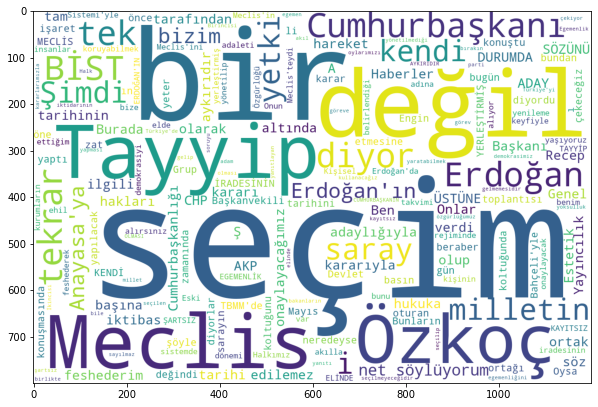

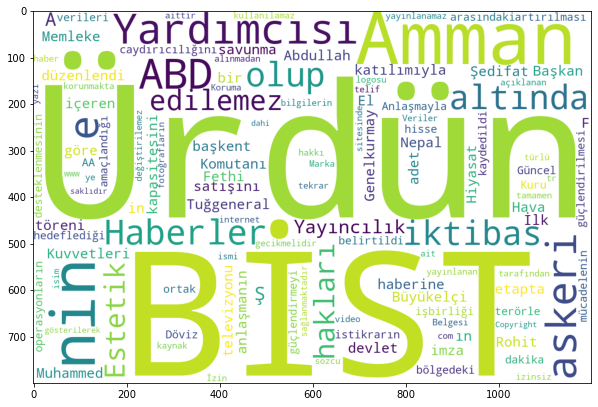

In [36]:
for i in range(5):
    raw_news = sozcu('https://www.sozcu.com.tr/rss/tum-haberler.xml')
    cleaned_news = stopwordCleanTR(raw_news)
    cloudplot(cleaned_news)
    plt.show()

# Question 2

For this question use [UFO Sightings Dataset](https://www.kaggle.com/code/hakeemtfrank/ufo-sightings-data-exploration/data) from Kaggle.

**Step 1:** Ingest the dataset as a pandas dataframe, and clean it if necessary.

**Step 2:** Plot a geographic heatmap of UFO sightings and find hotspots.

**Step 3:** Is there a statistically verifiable correlation between shape of the UFO and the duration of the sighting. Investigate.

## Answers

### Step 1

Ingesting the dataset as a pandas dataframe.

In [ ]:
ufo = pd.read_csv('complete.csv',error_bad_lines = False)
df_ufo = ufo

In [24]:
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,0.0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833


Cleaning the data and digitizing the coordinates in order to use them on the heat map.

In [11]:
df_ufo['latitude'] = pd.to_numeric(df_ufo['latitude'],errors='coerce')
df_ufo['longitude'] = pd.to_numeric(df_ufo['longitude'],errors='coerce')
df_ufo = ufo.dropna()

In [12]:
locations =pd.concat([df_ufo['latitude'], df_ufo['longitude']], axis=1)
arr = locations.to_numpy()
arr = list(arr)

### Step 2

Drawing a folium map based on a random point.

In [13]:
Map = folium.Map(location=[33.5861111,-86.2861111], zoom_start=6)
Map

Drawing a heat map by adding UFO observed points and showing hotspots.

In [14]:
HeatMap(arr).add_to(Map)
Map

### Step 3

Assigning numbers to string data names to determine a correlation between string and numeric values

In [15]:
ufo['shape']=ufo['shape'].astype('category').cat.codes

In [16]:
ufo['duration (seconds)'] = pd.to_numeric(ufo['duration (seconds)'],errors='coerce')

In [17]:
shape = pd.concat([ufo['shape'], ufo['duration (seconds)']], axis=1).dropna().reset_index(drop=True)

In [18]:
sorted_shape = shape.sort_values('duration (seconds)',ascending=False)
sorted_shape

,shape,duration (seconds)
609,25,97836000.0
59227,20,82800000.0
82455,19,66276000.0
76501,19,52623200.0
42372,-1,52623200.0
...,...,...
42838,11,0.0
42848,4,0.0
81778,4,0.0
42859,27,0.0


Correlation test.

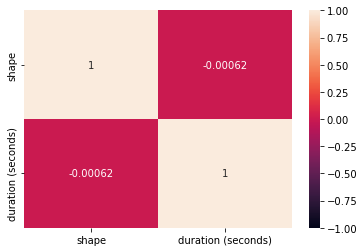

In [19]:
sns.heatmap(sorted_shape.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Since the Pearson correlation coefficient is negative and almost 0, we cannot say that there is a statistical correlation between the shapes of UFO's and the observation time of UFO's.